# EDA - Iris Dataset

In [30]:
# Library import
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Pyhton Function
def flowers(value):
    flower = iris.target_names[value]
    return flower

# Python Lambda Function
flowers_function = lambda x: iris.target_names[x]

In [14]:
# Iris Dataset
iris = datasets.load_iris()

# Dataframe
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data["species"] = iris.target
# Editing column names
iris_data.columns = iris_data.columns.str.replace(" ", "")
iris_data.species = iris_data.species.apply(flowers)
iris_data.head()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Univariate Analysis

In [16]:
# Data Size
iris_shape = iris_data.shape
print("Number of Observations: ", iris_shape[0])
print("Number of Columns: ", iris_shape[1])

Number of Observations:  150
Number of Columns:  5


In [15]:
# Data Characteristics
iris_data.describe()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
# Data Characteristics
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepallength(cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepalwidth(cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petallength(cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petalwidth(cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [18]:
# Data (Storage) Type
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength(cm)    150 non-null float64
sepalwidth(cm)     150 non-null float64
petallength(cm)    150 non-null float64
petalwidth(cm)     150 non-null float64
species            150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [19]:
# Null values 
iris_data.isnull().sum()

sepallength(cm)    0
sepalwidth(cm)     0
petallength(cm)    0
petalwidth(cm)     0
species            0
dtype: int64

In [22]:
# Variable Balance 
iris_data.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

<Figure size 1080x576 with 0 Axes>

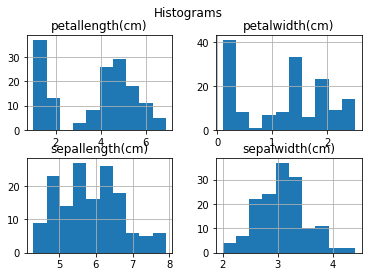

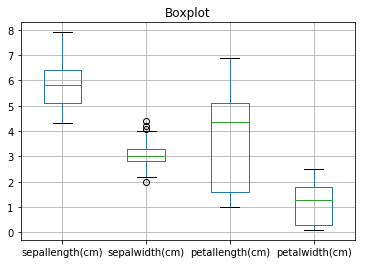

In [28]:
plt.figure(figsize = (15,8))
iris_data.hist()
plt.suptitle("Histograms")
plt.show()

iris_data.boxplot()
plt.title("Boxplot")
plt.show()

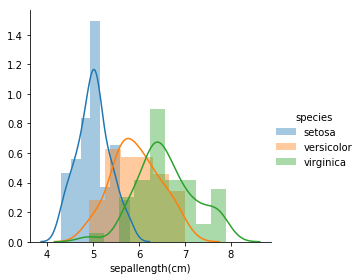

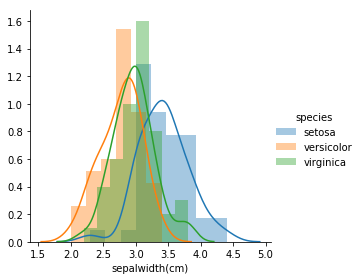

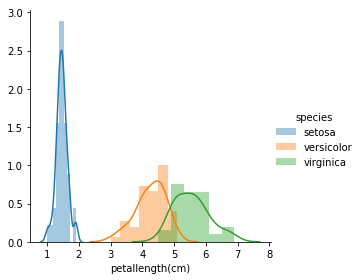

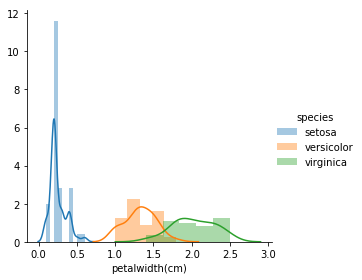

In [35]:
for column in iris_data.columns[:4]:
    g = sns.FacetGrid(iris_data, hue = "species", height = 4)
    g = g.map(sns.distplot, column)
    g = g.add_legend()
    plt.show()

In [37]:
# Variable Means 
iris_data.groupby(by = 'species').mean().T

species,setosa,versicolor,virginica
sepallength(cm),5.006,5.936,6.588
sepalwidth(cm),3.428,2.770,2.974
petallength(cm),1.462,4.260,5.552
petalwidth(cm),0.246,1.326,2.026


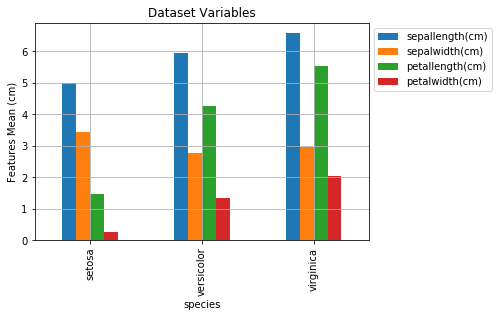

In [40]:
iris_data.groupby(by = 'species').mean().plot(kind = "bar")
plt.title("Dataset Variables")
plt.ylabel("Features Mean (cm)")
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))


## Multivariate Analysis

In [41]:
# Correlation matrix
correlation_matrix = iris_data.corr()

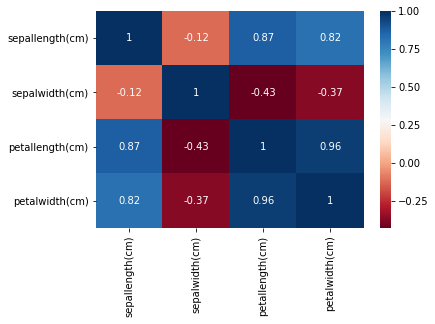

In [45]:
# Heatmap
sns.heatmap(correlation_matrix, annot = True, cmap ='RdBu')
plt.show()

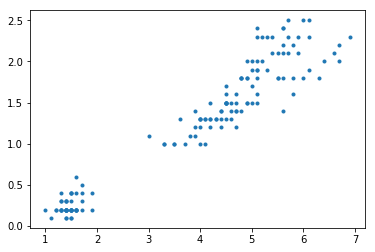

In [48]:
plt.plot(iris_data['petallength(cm)'], iris_data['petalwidth(cm)'], '.')
plt.show()

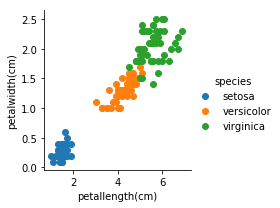

In [50]:
g = sns.FacetGrid(iris_data, hue = "species")
g = g.map(plt.scatter, 'petallength(cm)', 'petalwidth(cm)')
g = g.add_legend()
plt.show()

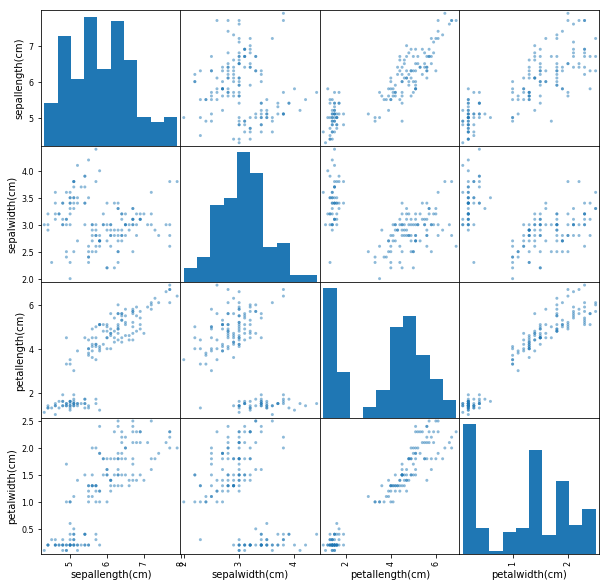

In [53]:
# Scatter Plot
from pandas.plotting import scatter_matrix
scatter_matrix(iris_data, figsize = (10,10))
plt.show()

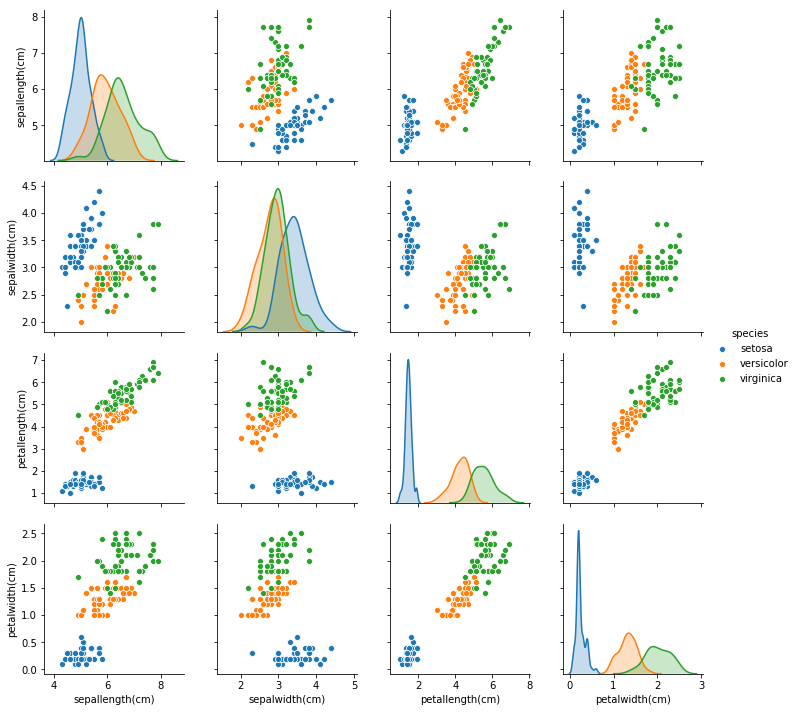

In [54]:
g = sns.pairplot(iris_data, hue = 'species')
plt.show()